## Density Plots

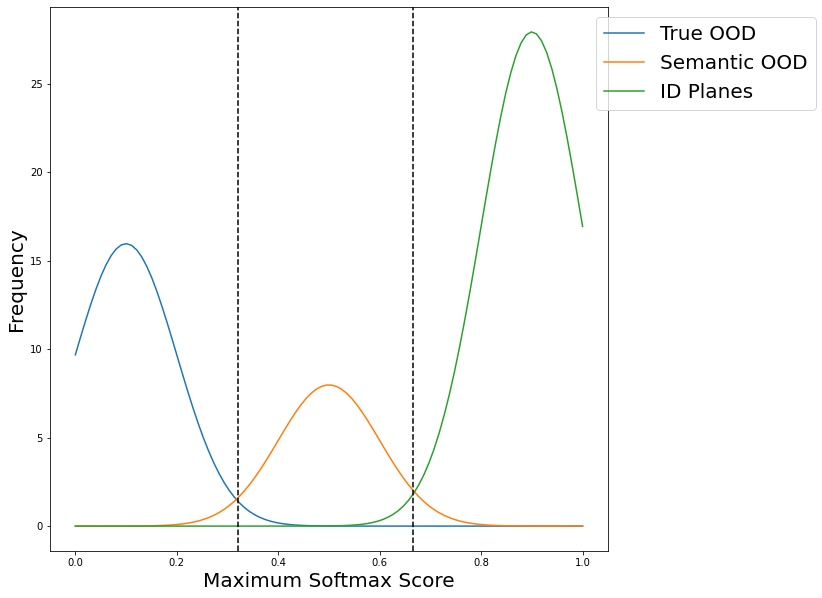

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

plt.figure(figsize=(10,10))

for name, mu, height in zip(["True OOD", "Semantic OOD", "ID Planes"], [0.1, 0.5, 0.9], [4, 2, 7]):
    variance = 0.01
    sigma = math.sqrt(variance)
    x = np.linspace(0, 1, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma) * height, label=name)
    plt.legend(loc='upper right', bbox_to_anchor=((1.39, 1)), fontsize=20)

plt.axvline(x=0.32, color='k', ls='--')
plt.axvline(x=0.665, color='k', ls='--')

plt.ylabel("Frequency", fontsize=20)
plt.xlabel("Maximum Softmax Score", fontsize=20)

plt.show()

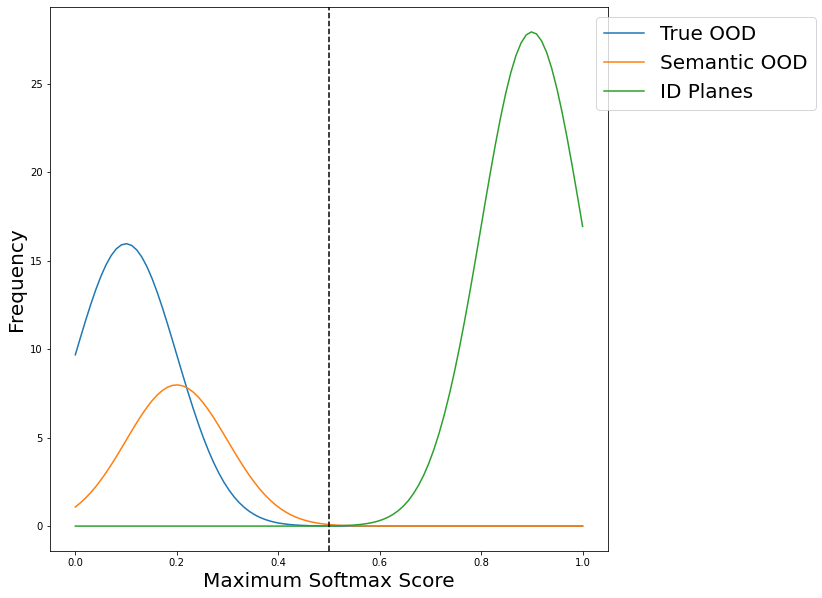

In [2]:
plt.figure(figsize=(10,10))

for name, mu, height in zip(["True OOD", "Semantic OOD", "ID Planes"], [0.1, 0.2, 0.9], [4, 2, 7]):
    variance = 0.01
    sigma = math.sqrt(variance)
    x = np.linspace(0, 1, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma) * height, label=name)
    plt.legend(loc='upper right', bbox_to_anchor=((1.39, 1)), fontsize=20)

plt.axvline(x=0.5, color='k', ls='--')

plt.ylabel("Frequency", fontsize=20)
plt.xlabel("Maximum Softmax Score", fontsize=20) 

plt.show()

## Results

In [6]:
import pandas as pd

### Planes

In [7]:
df = pd.read_csv('./planes_results/results_planes_vanilla.csv')

for model in ['cutmix', 'energy', 'oe', 'quad', 'ternary']:
    tmp = pd.read_csv(f'./planes_results/results_planes_{model}.csv')

    df = pd.concat([df, tmp])


tmp = df[['split', 'loss','detector', 'ID_accuracy'] + [col for col in df.columns if 'AUROC' in col]].groupby(['split', 'loss', 'detector']).mean()
tmp.groupby(['loss', 'detector']).mean().round(4) * 100

ID_accuracy  l1_AUROC  l2_AUROC  l3_AUROC  all_AUROC  \
loss    detector                                                               
cutmix  Softmax               93.23     94.93     90.51     79.31      89.63   
energy  NegativeEnergy        90.71     88.39     83.18     68.24      81.62   
oe      Softmax               91.06     88.37     87.46     72.63      84.19   
        softmax_temp          91.06     89.09     85.70     62.93      81.45   
quad    Softmax               92.88     94.81     89.86     79.73      89.43   
ternary Softmax               93.22     93.64     88.77     80.81      88.86   
vanilla Softmax               92.05     89.14     88.43     75.39      85.62   

                        dogs_AUROC  places_AUROC  cars_AUROC  cfg_AUROC  
loss    detector                                                         
cutmix  Softmax              99.99         99.95       97.86      99.27  
energy  NegativeEnergy       86.12         78.38       38.34      67.61  
oe      Softmax             100.00        100.00       99.99     100.00  
        softmax_temp        100.00        100.00       99.99     100.00  
quad    Softmax              99.95         99.96       98.36      99.42  
ternary Softmax              92.59         94.05       92.15      92.93  
vanilla Softmax              97.66         92.05       56.18      81.96

In [8]:
tmp = df[['split', 'loss','detector', 'ID_accuracy'] + [col for col in df.columns if 'FPR' in col]].groupby(['split', 'loss', 'detector']).mean()
tmp.groupby(['loss', 'detector']).mean().round(4) * 100

ID_accuracy  l1_FPR95TPR  l2_FPR95TPR  l3_FPR95TPR  \
loss    detector                                                             
cutmix  Softmax               93.23        13.77        33.19        59.38   
energy  NegativeEnergy        90.71        42.08        62.95        84.68   
oe      Softmax               91.06        33.03        39.08        75.33   
        softmax_temp          91.06        36.62        49.96        89.16   
quad    Softmax               92.88        14.78        35.23        55.19   
ternary Softmax               93.22        21.11        41.59        49.93   
vanilla Softmax               92.05        32.56        38.88        68.28   

                        all_FPR95TPR  dogs_FPR95TPR  places_FPR95TPR  \
loss    detector                                                       
cutmix  Softmax                40.88           0.00             0.00   
energy  NegativeEnergy         69.72          33.20            54.91   
oe      Softmax                54.64           0.00             0.00   
        softmax_temp           73.20           0.00             0.00   
quad    Softmax                42.32           0.13             0.02   
ternary Softmax                43.27          27.93            27.20   
vanilla Softmax                50.94          14.15            46.53   

                        cars_FPR95TPR  cfg_FPR95TPR  
loss    detector                                     
cutmix  Softmax                 14.21          1.64  
energy  NegativeEnergy          97.24         91.41  
oe      Softmax                  0.04          0.00  
        softmax_temp             0.03          0.00  
quad    Softmax                  9.02          1.39  
ternary Softmax                 45.60         34.81  
vanilla Softmax                 89.30         78.23

### Ships

In [10]:
ships_df = pd.read_csv('./results_ships.csv')
ships_df = ships_df[ships_df['split'] == 'military']

ships_df[['split', 'loss','detector', 'ID_accuracy'] + [col for col in ships_df.columns if 'AUROC' in col]].groupby(['split', 'loss', 'detector']).mean().round(4) * 100

ID_accuracy  l1_AUROC  l2_AUROC  all_AUROC  \
split    loss    detector                                                     
military cutmix  Softmax               95.15     93.99     79.51      91.96   
         energy  NegativeEnergy        94.16     85.20     70.66      83.17   
         oe      Softmax               94.12     96.95     85.48      95.35   
                 softmax_temp          94.12     97.86     85.81      96.17   
         quad    Softmax               95.46     96.47     83.27      94.63   
         ternary Softmax               95.24     91.49     79.67      89.83   
         vanilla Softmax               93.81     89.54     76.87      87.77   

                                 dogs_AUROC  places_AUROC  cars_AUROC  \
split    loss    detector                                               
military cutmix  Softmax              97.36         93.06       97.78   
         energy  NegativeEnergy       96.16         77.07       78.03   
         oe      Softmax              99.54         96.90       99.34   
                 softmax_temp         99.54         96.92       99.36   
         quad    Softmax              98.22         95.17       97.99   
         ternary Softmax              94.89         93.79       95.41   
         vanilla Softmax              73.62         63.91       58.35   

                                 cfg_AUROC  
split    loss    detector                   
military cutmix  Softmax             96.06  
         energy  NegativeEnergy      83.75  
         oe      Softmax             98.59  
                 softmax_temp        98.61  
         quad    Softmax             97.13  
         ternary Softmax             94.70  
         vanilla Softmax             65.29

In [11]:
ships_df[['split', 'loss','detector', 'ID_accuracy'] + [col for col in ships_df.columns if 'FPR' in col]].groupby(['split', 'loss', 'detector']).mean().round(4) * 100

ID_accuracy  l1_FPR95TPR  l2_FPR95TPR  \
split    loss    detector                                                
military cutmix  Softmax               95.15        28.85        83.11   
         energy  NegativeEnergy        94.16        52.02        87.86   
         oe      Softmax               94.12        13.98        58.31   
                 softmax_temp          94.12        11.15        61.71   
         quad    Softmax               95.46        14.69        71.80   
         ternary Softmax               95.24        37.51        77.86   
         vanilla Softmax               93.81        41.03        88.41   

                                 all_FPR95TPR  dogs_FPR95TPR  places_FPR95TPR  \
split    loss    detector                                                       
military cutmix  Softmax                50.00          14.69            30.48   
         energy  NegativeEnergy         62.10          16.44            69.40   
         oe      Softmax                21.75           2.03            11.84   
                 softmax_temp           22.04           1.94            11.87   
         quad    Softmax                25.64           9.03            22.56   
         ternary Softmax                47.48          24.76            29.87   
         vanilla Softmax                53.11          73.45            82.54   

                                 cars_FPR95TPR  cfg_FPR95TPR  
split    loss    detector                                     
military cutmix  Softmax                 11.76         20.97  
         energy  NegativeEnergy          60.60         59.19  
         oe      Softmax                  2.50          6.02  
                 softmax_temp             2.44          5.98  
         quad    Softmax                 12.62         16.35  
         ternary Softmax                 22.52         27.25  
         vanilla Softmax                 77.89         79.06